# [QPLIB](https://qplib.zib.de/index.html)
Furini, F., Traversi, E., Belotti, P. et al. QPLIB: a library of quadratic programming instances. Math. Prog. Comp. 11, 237–265 (2019). https://doi.org/10.1007/s12532-018-0147-4

[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/qci-wdyk/eqc-models-tutorial/blob/main/tutorial08-qplib.ipynb)

## QPLIB with eqc-models
### QCL
Solving three QCL models. These are quadratic, continuous models with linear constraints. They are a natural fit for Dirac-3 because of the single constraint each has: the sum of all decision variables is equal to 1. 

In [1]:
import os.path
import numpy as np
import matplotlib.pyplot as plt
from eqc_models.utilities.qplib import file_to_model
from eqc_models.solvers import Dirac3ContinuousCloudSolver, Dirac1CloudSolver
file_names = {"0018": os.path.expanduser("~/Downloads/QPLIB_0018.qplib"),
              "2712": os.path.expanduser("~/Downloads/QPLIB_2712.qplib"),
              "2761": os.path.expanduser("~/Downloads/QPLIB_2761.qplib"),
              "5881": os.path.expanduser("~/Downloads/QPLIB_5881.qplib")}
for key in file_names:
    assert os.path.exists(file_names[key])


## [QPLIB_0018](https://qplib.zib.de/QPLIB_0018.html)

50 nonnegative variables with all quadratic terms.

In [2]:
sum_constraint = 1
model = file_to_model(open(file_names["0018"]))
model.upper_bound = np.array([sum_constraint for i in range(model.n)])
model.penalty_multiplier = 0 # the qplib import reads the constraint into the hamiltonian, so this eliminates it

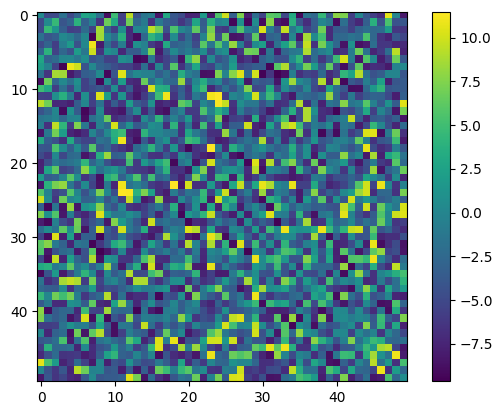

In [3]:
plt.imshow(model.qubo.Q)
cb = plt.colorbar()

In [4]:
solver = Dirac3ContinuousCloudSolver()

In [5]:
response = solver.solve(model, num_samples=5, relaxation_schedule=1, sum_constraint=1, solution_precision=None)
print(response["results"]["energies"])
for k, v in zip(range(len(response["results"]["solutions"][0])), response["results"]["solutions"][0]):
    if v > 0:
        print(k+2, v)
metrics = solver.getMetrics(response["job_info"]["job_id"])

2025-03-15 10:17:25 - Dirac allocation balance = 0 s (unmetered)
2025-03-15 10:17:25 - Job submitted: job_id='67d5a81500e804f113aefcc2'
2025-03-15 10:17:25 - QUEUED
2025-03-15 10:20:12 - RUNNING
2025-03-15 10:20:27 - COMPLETED
2025-03-15 10:20:30 - Dirac allocation balance = 0 s (unmetered)
[-6.3858871, -6.3858671, -6.3858547, -5.7619386, -5.685616]
15 0.2088423
18 0.2733161
40 0.2285143
42 0.2893231


In [6]:
runtime = metrics["job_metrics"]["time_ns"]["device"]["dirac-3_normalized_qudit"]["samples"]["runtime"]
postprocessing = metrics["job_metrics"]["time_ns"]["device"]["dirac-3_normalized_qudit"]["samples"]["postprocessing_time"]
preprocessing = metrics["job_metrics"]["time_ns"]["device"]["dirac-3_normalized_qudit"]["samples"]["preprocessing_time"]
print(f"Preprocessing time: {preprocessing/1e9}s")
for r, p in zip(runtime, postprocessing):
    print(f"Sample runtime + postprocessing {(r+p)/1e9}s")

Preprocessing time: 0.02538822s
Sample runtime + postprocessing 3.540721655s
Sample runtime + postprocessing 2.636230707s
Sample runtime + postprocessing 2.752822399s
Sample runtime + postprocessing 2.83464241s
Sample runtime + postprocessing 2.949173688s


[0018 solution](https://qplib.zib.de/sol/QPLIB_0018.sol)

## [QPLIB 2712](https://qplib.zib.de/sol/QPLIB_2712.sol)

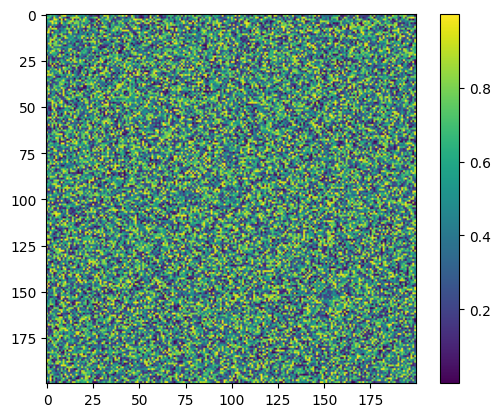

In [7]:
model = file_to_model(open(file_names["2712"]))
model.upper_bound = np.array([sum_constraint for i in range(model.linear_objective.shape[0])])
model.penalty_multiplier = 0 # the qplib import reads the constraint into the hamiltonian, so this eliminates it
plt.imshow(model.qubo.Q)
cb = plt.colorbar()

In [8]:

response = solver.solve(model, num_samples=5, relaxation_schedule=1, sum_constraint=1)
print(response["results"]["energies"])
for k, v in zip(range(len(response["results"]["solutions"][0])), response["results"]["solutions"][0]):
    if v > 0:
        print(k+2, v)
metrics = solver.getMetrics(job_id=response["job_info"]["job_id"])

2025-03-15 10:20:36 - Dirac allocation balance = 0 s (unmetered)
2025-03-15 10:20:36 - Job submitted: job_id='67d5a8d400e804f113aefcc3'
2025-03-15 10:20:36 - QUEUED
2025-03-15 10:20:39 - RUNNING
2025-03-15 10:21:41 - COMPLETED
2025-03-15 10:21:44 - Dirac allocation balance = 0 s (unmetered)
[0.0148526, 0.0649759, 0.069569, 0.0696789, 0.1067949]
10 9e-07
30 0.0479538
84 0.9511089
153 3e-06
169 0.0009273
187 1e-07


In [9]:
runtime = metrics["job_metrics"]["time_ns"]["device"]["dirac-3_normalized_qudit"]["samples"]["runtime"]
postprocessing = metrics["job_metrics"]["time_ns"]["device"]["dirac-3_normalized_qudit"]["samples"]["postprocessing_time"]
preprocessing = metrics["job_metrics"]["time_ns"]["device"]["dirac-3_normalized_qudit"]["samples"]["preprocessing_time"]
print(f"Preprocessing time: {preprocessing/1e9}s")
for r, p in zip(runtime, postprocessing):
    print(f"Sample runtime + postprocessing {(r+p)/1e9}s")

Preprocessing time: 0.166356325s
Sample runtime + postprocessing 12.656923295s
Sample runtime + postprocessing 12.238454818s
Sample runtime + postprocessing 16.323533058s
Sample runtime + postprocessing 10.099347115s
Sample runtime + postprocessing 14.829885483s


[2712 Solution](https://qplib.zib.de/sol/QPLIB_2712.sol)

## [QPLIB 2761](https://qplib.zib.de/QPLIB_2761.html)



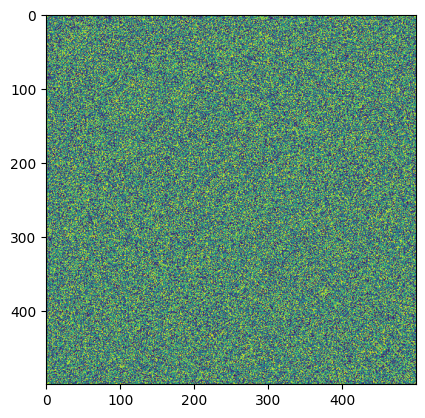

In [10]:
model = file_to_model(open(file_names["2761"]))
model.upper_bound = np.array([sum_constraint for i in range(model.linear_objective.shape[0])])
model.penalty_multiplier = 0 # the qplib import reads the constraint into the hamiltonian, so this eliminates it
plt.imshow(model.qubo.Q)

In [11]:

response = solver.solve(model, num_samples=10, relaxation_schedule=2, sum_constraint=1)
print(response["results"]["energies"])
for k, v in zip(range(len(response["results"]["solutions"][0])), response["results"]["solutions"][0]):
    if v > 0:
        print(k+2, v)
metrics = solver.getMetrics(job_id=response["job_info"]["job_id"])

2025-03-15 10:21:54 - Dirac allocation balance = 0 s (unmetered)
2025-03-15 10:21:54 - Job submitted: job_id='67d5a92200e804f113aefcc4'
2025-03-15 10:21:54 - QUEUED
2025-03-15 10:21:57 - RUNNING
2025-03-15 10:34:38 - COMPLETED
2025-03-15 10:34:41 - Dirac allocation balance = 0 s (unmetered)
[0.0311525, 0.0749448, 0.0829747, 0.0960424, 0.1022102, 0.1371683, 0.1610826, 0.1650149, 0.166915, 0.2568448]
11 0.1689199
49 0.8212324
63 0.0010874
153 0.0042029
213 0.0041774
233 0.0003799


[2761 Solution](https://qplib.zib.de/sol/QPLIB_2761.sol)

In [12]:
runtime = metrics["job_metrics"]["time_ns"]["device"]["dirac-3_normalized_qudit"]["samples"]["runtime"]
postprocessing = metrics["job_metrics"]["time_ns"]["device"]["dirac-3_normalized_qudit"]["samples"]["postprocessing_time"]
preprocessing = metrics["job_metrics"]["time_ns"]["device"]["dirac-3_normalized_qudit"]["samples"]["preprocessing_time"]
print(f"Preprocessing time: {preprocessing/1e9}s")
for r, p in zip(runtime, postprocessing):
    print(f"Sample runtime + postprocessing {(r+p)/1e9}s")

Preprocessing time: 1.052542925s
Sample runtime + postprocessing 168.733230591s
Sample runtime + postprocessing 128.890693665s
Sample runtime + postprocessing 129.948051453s
Sample runtime + postprocessing 131.00164032s
Sample runtime + postprocessing 130.236629486s
Sample runtime + postprocessing 127.928913116s
Sample runtime + postprocessing 130.804168701s
Sample runtime + postprocessing 129.289886475s
Sample runtime + postprocessing 126.979473114s
Sample runtime + postprocessing 131.03107071s


## QPLIB 5881

QUBO

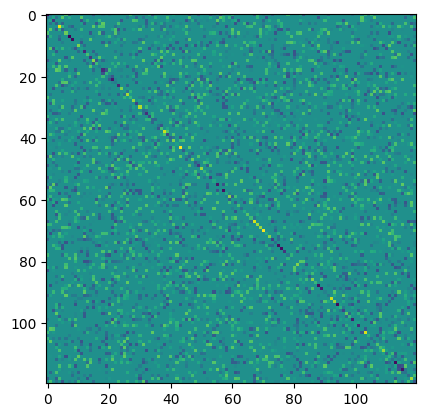

In [13]:
model = file_to_model(open(file_names["5881"]))
model.upper_bound = np.array([1 for i in range(model.n)])
model.penalty_multiplier = 0 # the qplib import reads the constraint into the hamiltonian, so this eliminates it
plt.imshow(model.qubo.Q)

In [14]:
solver = Dirac1CloudSolver()

In [15]:
response = solver.solve(model, num_samples=10)
print(response["results"]["energies"])
for k, v in zip(range(len(response["results"]["solutions"][0])), response["results"]["solutions"][0]):
    if v > 0:
        print(k+2, v)
metrics = solver.getMetrics(job_id=response["job_info"]["job_id"])

2025-03-15 10:34:44 - Dirac allocation balance = 0 s (unmetered)
2025-03-15 10:34:45 - Job submitted: job_id='67d5ac2500e804f113aefcc5'
2025-03-15 10:34:45 - RUNNING
2025-03-15 10:41:20 - COMPLETED
2025-03-15 10:41:23 - Dirac allocation balance = 0 s (unmetered)
[-13051, -13049, -13046, -13043, -12999, -12985, -12981, -12947]
2 1
4 1
5 1
6 1
8 1
9 1
10 1
11 1
12 1
13 1
14 1
15 1
16 1
17 1
18 1
20 1
21 1
22 1
23 1
26 1
29 1
31 1
32 1
34 1
35 1
36 1
38 1
39 1
41 1
42 1
45 1
46 1
50 1
52 1
53 1
57 1
59 1
60 1
61 1
65 1
67 1
69 1
71 1
72 1
73 1
75 1
76 1
77 1
78 1
82 1
85 1
87 1
88 1
91 1
92 1
94 1
96 1
97 1
98 1
99 1
100 1
101 1
103 1
106 1
107 1
108 1
109 1
112 1
115 1
117 1
118 1
119 1
120 1
121 1


In [16]:
runtime = metrics["job_metrics"]["time_ns"]["device"]["dirac-1"]["samples"]["runtime"]
for r in runtime:
    print(f"Sample runtime {(r)/1e9}s")

Sample runtime 0.900481999s
Sample runtime 0.878194988s
Sample runtime 0.886234999s
Sample runtime 0.895904005s
Sample runtime 0.892214s
Sample runtime 0.882942021s
Sample runtime 0.891380012s
Sample runtime 0.878793001s
Sample runtime 0.882852972s
Sample runtime 0.877919972s


[QPLIB 5881 Solution](https://qplib.zib.de/sol/QPLIB_5881.sol)